# Density Estimation using KDE

In this notebook, we showcase how to use the `KernelDensity` class on a simple toy example.

In [1]:
# load required packages
import torch
import matplotlib.pyplot as plt
import scienceplots

from torchkde.modules import KernelDensity 
from distributions import BartSimpsonDistribution

In [2]:
torch.manual_seed(0)

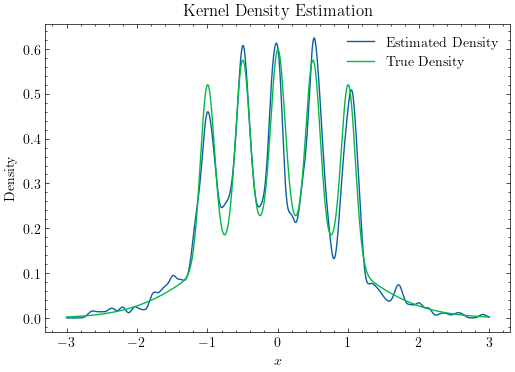

In [4]:
# Create some data from the "Bart Simpson distribution" (see https://www.stat.cmu.edu/~larry/=sml/densityestimation.pdf)
X = BartSimpsonDistribution().sample((1000,))
# Fit a kernel density estimator to the data
kde = KernelDensity(bandwidth=0.05, kernel='gaussian')
kde.fit(X)
# Evaluate the KDE on a grid
x = torch.linspace(-3, 3, 10000).unsqueeze(-1)
log_prob = kde.score_samples(x)
dx = x[1] - x[0]
prob = log_prob.exp()/(log_prob.exp().sum()*dx)

plt.style.use('science')
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman']
plt.xlabel('$x$')
plt.ylabel('Density')
plt.title('Kernel Density Estimation')
# Plot the estimated density
plt.plot(x, prob, label='Estimated Density')
# Plot the true density
plt.plot(x, BartSimpsonDistribution().log_prob(x).exp(), label='True Density')
# Add a legend in the upper right corner
plt.legend(loc='upper right')
plt.savefig('plots/bart_simpson_kde.pdf')
plt.savefig('plots/bart_simpson_kde.svg')
plt.show()